In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

/Users/meenakshigopalakrishnan/anaconda3/envs/mnistClassification/lib/python3.12/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
X, y = mnist["data"], mnist["target"]
X.shape
y.shape

(70000,)

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import matplotlib.pyplot as plt
some_digit = X.iloc[1]
some_digit_array = some_digit.to_numpy()
print(type(some_digit_array))
print("Shape of some_digit:", some_digit.shape)
some_digit_image = some_digit.values.reshape(28, 28)


<class 'numpy.ndarray'>
Shape of some_digit: (784,)


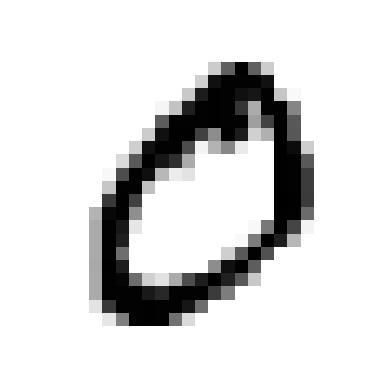

In [25]:
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [28]:
y[1]

'0'

In [29]:
y = y.astype(np.uint8)

In [30]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [46]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
knn_clf.predict([some_digit])

/Users/meenakshigopalakrishnan/anaconda3/envs/mnistClassification/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=uint8)

In [54]:
from sklearn.model_selection import cross_val_predict
import numpy as np


In [57]:
X_train_contiguous = np.ascontiguousarray(X_train)

y_train_knn_pred = cross_val_predict(knn_clf, X_train_contiguous, y_train, cv=3)


In [58]:
from sklearn.metrics import f1_score

In [59]:
f1_score(y_train, y_train_knn_pred, average="macro")

0.9672164755274896

In [74]:
sample_index =89
X_train_array = X_train.values  # Convert DataFrame or Series to numpy array
X_sample = X_train_array[sample_index].reshape(1, -1)
predicted_label = knn_clf.predict(X_sample)[0]

/Users/meenakshigopalakrishnan/anaconda3/envs/mnistClassification/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [75]:
actual_label = y_train[sample_index]


In [76]:
if predicted_label == actual_label:
    print("Prediction is correct. Predicted Label:", predicted_label)
else:
    print("Prediction is incorrect. Predicted Label:", predicted_label, "Actual Label:", actual_label)

Prediction is correct. Predicted Label: 4
